# Intro 

### Libraries

In [1]:
#Different libraries that we need 

import numpy as np # numerical python for operations on arrays, matrix
import pandas as pd # very efficient for handling databases 
import matplotlib.pyplot as plt # for graphs 
import glob # for accessing directories (where the data are)
from scipy import stats # scientific python - for special functions and probability densities 
import re # for regular expressions 
import math # for handgling with trigonometric functions 


# in order to plot inline, Jupyter Notebook only 

In [2]:
%matplotlib notebook

### Self-made functions

In [3]:
# We are using this function in order to get the food angle with respect to the center of the maze 
# To be short : polar coordinates angle from cartesian coordinates 
# We need this angle in order to perform vector arithmetic to get current position to food vector 

def angle_from_position(x_coordinate,y_coordinate):
    if math.degrees(math.atan2(x_coordinate, y_coordinate)) >= 0 : 
        return float("{0:.2f}".format(math.degrees(math.atan2(x_coordinate, y_coordinate)))) 
    else : 
        return (360 + float("{0:.2f}".format(math.degrees(math.atan2(x_coordinate, y_coordinate)))))


## Importing Data from .csv files

In [4]:
# Import all the .csv files 
trackFiles = []
trackFiles = glob.glob('C:/Users/jamesjun/Desktop/TrackFiles/Shuffled/ShuffleCsv/Tracks/*.csv')

shapeFiles = []
shapeFiles = glob.glob('C:/Users/jamesjun/Desktop/TrackFiles/Shuffled/ShuffleCsv/Shapes/*.csv')

In [5]:
# Filtering probe trials 
# if probeFilter = True, probetrials are not used in the future statistics
# if probeFilter = False, probetrials are going to take part in the stats
probeFilter = True 

if probeFilter == True:
    regExpr = re.compile(r'p_Track')
    regExpr2 = re.compile(r'p_shape')
    trackFiles = list(filter(lambda i : not regExpr.search(i), trackFiles))
    shapeFiles = list(filter(lambda i : not regExpr2.search(i), shapeFiles))
    
else : 
    trackFiles = trackFiles 
    shapeFiles = shapeFiles

In [6]:
# Creating list of tracking Data as list of pandas dataframes 
trackData = []
for i in range(0,len(trackFiles)) : 
    trackData.append(pd.read_csv(trackFiles[i], names = ["Time", "X", "Y", "OP"]))
    


In [7]:
#Adding landmark name and color in order to create a new dataframe for shapes

landm_name = {'Shape': ['Triangle Lg', 'Triangle Sm',  'Square Lg', 'Square Sm', 'Circle Lg', 'Circle Sm', 'Food']} 
shape_names = pd.DataFrame(data = landm_name)

color_shapes = pd.DataFrame(data = np.linspace(0,1,7), columns= ['Color'])

In [8]:
shapeData = []
for i in range(0,len(shapeFiles)) : 
    shapeData.append(pd.read_csv(shapeFiles[i], names = ["X", "Y", "Angle"]))
    shapeData[i] = pd.concat([shape_names,shapeData[i]], axis = 1)
    shapeData[i] = pd.concat([shapeData[i], color_shapes], axis = 1)

In [9]:
#Quick check 
len(trackData) == len(shapeData)

True

# Initial Heading Distributions

## Initial Heading Angle Distribution -- Late learning Trials

In [10]:
# Extracting every first row from each trackData dataframe using iloc 
# ref  : (https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection)
IOPDistrib = pd.concat([trackData[i].iloc[[0]].drop(columns = ['Time']) for i in range(141, len(trackData))]) 

<IPython.core.display.Javascript object>


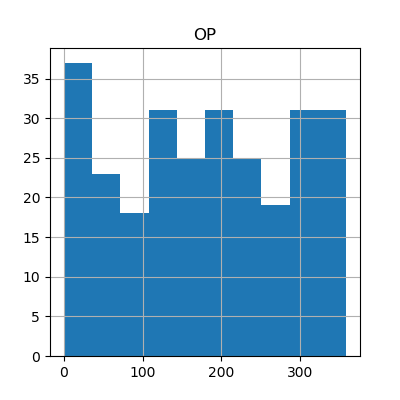

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000607381B198>]],
      dtype=object)

In [11]:
# Plotting the histogram 
IOPDistrib.hist(column = 'OP', bins = 10, figsize=(4,4))

## Initial Heading Magnitude Distribution - Late Learning Trials

In [12]:
# Getting initial position vectors 
initialPositionVector = []

for i in range(0,len(positionVector)):
    initialPositionVector.append(positionVector[i].drop(positionVector[i].index[[0,1]]))

# Distribution of initial position as pandas dataframe (very efficient)
IPVDistribution = pd.concat(initialPositionVector[i].iloc[[0]].drop(columns = ['OP','Time']) for i in range(141,len(trackData)))

NameError: name 'positionVector' is not defined

In [13]:
# Plotting the distribution as a histogram 
IPVDistribution.hist(column = 'Magnitude', bins = 10
                     , density = True)

'''
# Gaussian Distribution Fitting 
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(IPVDistribution['Magnitude']))

m, s = stats.norm.fit(IPVDistribution['Magnitude']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
'''

NameError: name 'IPVDistribution' is not defined

# Plotting Trajectories 
### Plotting an Example trajectory (it can be done for every trajectory)

<IPython.core.display.Javascript object>


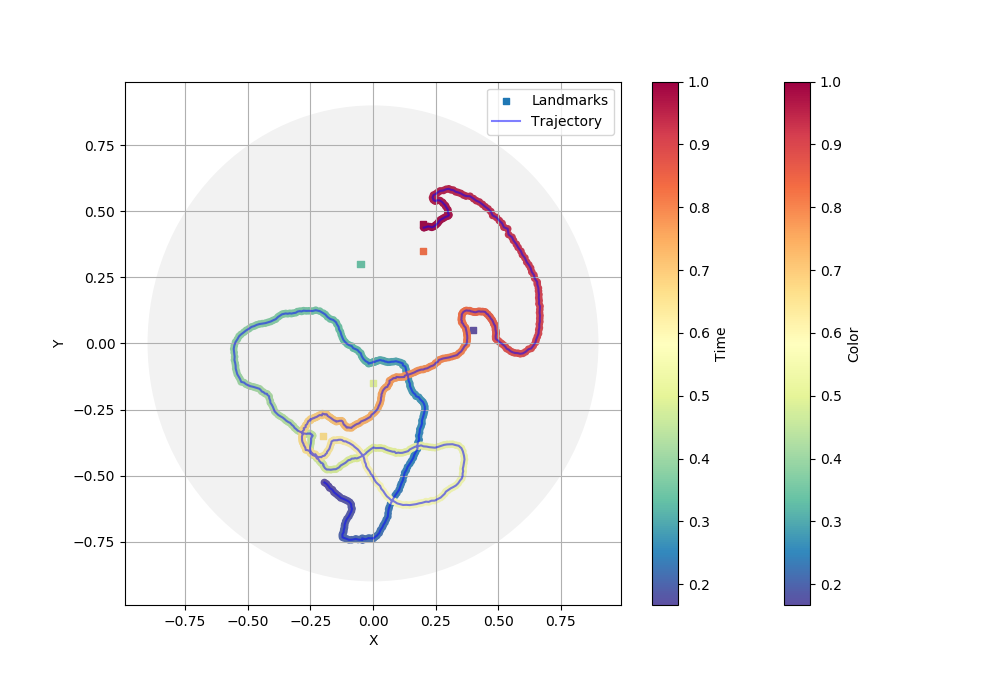

In [14]:
import matplotlib.patches as patches

#Select trajectory number (based on number of videos = 444)
traj_number = 200

# Plotting each trajectory with Spectral colormap based on time --> as James did in matlab 
# The colormap is related to time --> take a look on the side of the plot 


#plt.figure()
fig, ax = plt.subplots()
circ = patches.Circle((0, 0), 0.9, alpha=0.10, fc='grey')
ax.add_patch(circ)

# Setting positions of landmarks and trajectory points 
shapeData[traj_number].plot.scatter(x = "X", y = 'Y',ax = ax, marker = 's',style = 'o', label = 'Landmarks', c = 'Color', cmap = 'Spectral_r')
trackData[traj_number].plot.scatter(x = "X", y = 'Y',ax = ax,c = 'Time', cmap = 'Spectral_r')

# Adding polygonal chain in order to see the trajectory and get vector length later 
trackData[traj_number].plot.line(x = "X", y = 'Y', ax = ax, style = 'b', alpha = 0.5, grid = True, figsize = (10,6.8), label = 'Trajectory')


# Vector magnitude and angle

## Position Vector (time dependent) -- Whole Dataset



In [15]:
# Getting the difference between coordinates (x,y) in order to get the magnitude
# List of Dataframes
difference = []

for i in range(0,len(trackData)):
    pivotVar = trackData[i].diff().drop(columns = ['OP'])
    difference.append(pivotVar.drop(pivotVar.index[0]))
    
# Getting magnitude as norm (np.linalg.norm)
magnitude = []
for i in range(0,len(difference)):
    magnitude.append(difference[i][['X' , 'Y']].apply(lambda x : np.linalg.norm(x) , axis = 1).to_frame())
    magnitude[i].columns = ['Magnitude']

In [16]:
# Getting angle 
angle = []
for i in range(0,len(trackData)):
    pivotVar = trackData[i].drop(columns = ['Time','X', 'Y'] )
    angle.append(pivotVar.drop(pivotVar.index[0]))

In [17]:
# Getting Time
time = []
for i in range(0,len(difference)):
    time.append(difference[i].drop(columns = ['X', 'Y']))

In [18]:
# Getting final dataframe --> vector features
positionVector = []
pivotDataframe = []

for i in range(0,len(magnitude)):
    pivotDataframe.append(pd.merge(magnitude[i], angle[i], left_index= True, right_index = True))
    positionVector.append(pd.merge(pivotDataframe[i], time[i], left_index= True, right_index = True))
    

<IPython.core.display.Javascript object>


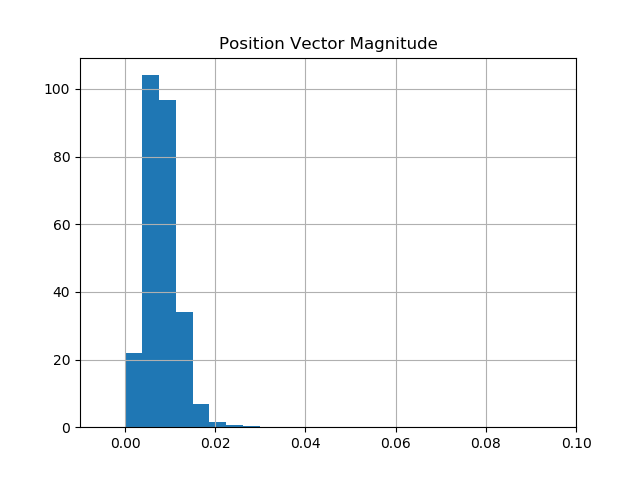

(-0.01, 0.1)

In [19]:
# VectorMagnitude Distribution
# Take a look at the Learning Curve to set range(latetrials) 
PMDistribution = pd.concat([positionVector[i] for i in range(141, len(trackData))]) 

# Magnitude Distribution
PMDistribution.hist(column= 'Magnitude', bins = 100 ,density = True)
plt.title('Position Vector Magnitude')

'''
# Gaussian Distribution Fitting 
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(PMDistribution['Magnitude']))

m, s = stats.norm.fit(PMDistribution['Magnitude']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, 0.0081, 0.007) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
 '''
plt.xlim((-0.01,0.10))

In [20]:
# Angle Distribution --> seems to be quite constant 
PMDistribution.hist(column= 'OP', bins = 100)
plt.title('Position Vector Angle')

<IPython.core.display.Javascript object>

Text(0.5,1,'Position Vector Angle')

## Velocity vector -- Whole dataset

In [21]:
# Getting difference between two subsequent positions --> differential geometry velocity
posDifference = []

for i in range(0,len(positionVector)):
    pivotVar = positionVector[i].diff().drop(columns = ['OP', 'Time'])
    posDifference.append(pivotVar.drop(pivotVar.index[0]))

In [22]:
# Time difference between two subsequent positions 
timeDifference = []
for i in range(0,len(time)):
    timeDifference.append(time[i].drop(time[i].index[0]))

In [23]:
# Setting velocity vector
velocityVector = [] 
for i in range(0,len(posDifference)):
    pivotVar = pd.merge(posDifference[i], timeDifference[i], left_index= True, right_index = True)
    velocityVector.append(pivotVar.rename(columns = {'Magnitude' : 'PosDifference'}))
    

# Getting velocity as differential geometry definition
# Getting magnitude
velocity = []
for i in range(0,len(velocityVector)):
    pivotVar = velocityVector[i]['PosDifference']/velocityVector[i]['Time']
    velocity.append(pivotVar.apply(lambda x : np.linalg.norm(x)).to_frame())
    velocity[i].columns = ['Velocity']
    
for i in range(0,len(velocityVector)):
# Final velocity Dataframe 
    velocityVector[i] = pd.merge(velocityVector[i], velocity[i], left_index= True, right_index = True)


In [24]:
# Velocity Magnitude Distribution 
VMDistribution = pd.concat([velocityVector[i] for i in range(141, len(trackData))])

# Handle exceptions (like infinity - sometimes the fish was static)
VMDistribution = VMDistribution.fillna(value = 0 )
VMDistribution = VMDistribution.replace(np.inf, 0)
VMDistribution = VMDistribution.replace(-np.inf, 0)

# Histogram / density = true , means normalized data 
VMDistribution.hist(column= 'Velocity', bins = 600, density = True, figsize= (8,8))
plt.title('Velocity Vector Magnitude')


# Exponential fitting  / Half normal Distribution Fitting 
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(VMDistribution['Velocity']))
plt.xlim((-0.01,0.4))

loc, scale = stats.expon.fit(VMDistribution['Velocity']) # get mean and standard deviation  
pdf_expon = stats.expon.pdf(lnspc
                            ,loc , scale) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_expon, label="Exponential") # plot it


lochn, scalehn = stats.halfnorm.fit(VMDistribution['Velocity']) # get mean and standard deviation  
pdf_hnorm = stats.halfnorm.pdf(lnspc
                            ,lochn , 0.0335) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_hnorm, label="HalfNormal") # plot it

plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)

<IPython.core.display.Javascript object>

# Food - Position Vector

In [25]:
# Food Angle From Origin (center of the maze)
FAFromOrigin = []

for i in range(0, len(shapeData)): 
    FAFromOrigin.append(angle_from_position(shapeData[i].at[6, 'X'], shapeData[i].at[6, 'Y']))


In [26]:
# Adding column of F-O Angle in every trackDataDataframe
# list of dataframes withFAFromOrigin as values 
FOAngleDf = []
PFAngleDf = []

for j in range(0,len(trackData)):
    food_angle_value_array = np.full((len(trackData[j]), 1), FAFromOrigin[j])
    FOAngleDf.append(pd.DataFrame(food_angle_value_array, columns = ['FOAngle']))
    
    pivot_array = np.full((len(trackData[j]), 1), 0)
    PFAngleDf.append(pd.DataFrame(pivot_array, columns = ['PFAngle']))
                                     
    

In [30]:
# New trackData Dataframe, with Food - Origin angle 
for i in range(0,len(trackData)):
    trackData[i] = pd.concat([trackData[i], FOAngleDf[i]], axis = 1 )
    trackData[i] = pd.concat([trackData[i], PFAngleDf[i]], axis = 1 )
    
    

In [ ]:
for i in range(0,len(trackData)):
    for j in range(0,len(trackData[i])):
        if trackData[i]['FOAngle'][j] - trackData[i]['OP'][j] >= 0 :
            trackData[i]['PFAngle'][j] = trackData[i]['FOAngle'][j] - trackData[i]['OP'][j]
        else : 
            trackData[i]['PFAngle'][j] = 360 + (trackData[i]['FOAngle'][j] - trackData[i]['OP'][j])
        

C:\Users\jamesjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jamesjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
trackData[0]

In [ ]:
for i in range(0,len(trackData)):
    print("trackData["+str(i)+"].to_csv('C:\\Users\jamesjun\Desktop\TrackFiles\CsvFinal\Shuffle\\trackData"+str(i)+"', encoding='utf-8', index=False)")